### 진행 상황

- 크롤링 시, 날짜 추가.
- 검색 조건 - 연간, 관련 순, 4분 이하, 검색어 : 타다+금지법  (+ 붙이는게 영향이 있다고...)

####느린 부분

-  1. 연관성 분석을 위해 댓글별로 단어 쪼개기 
    - 에러 메세지 : 
         - java.lang.ArrayIndexOutOfBoundsException: -1
    - 이유 : 100건(?) 이상 들어가면 에러가 나는 것으로 보임. 기준은 모르겠음.
    - 대안 : 이전에 kkma로 했는데 변경해서 다시 하면 -> 작동 함
    - 형태소 분석기 성능 비교 
    - https://iostream.tistory.com/144 -> 한나눔이 속도도 빠르고 일반적인 문장인데 못 나누는 이유는..? 띄어쓰기가 있어서 그런가.
-  2. 연관성 분석
    - 에러 메세지:
        - 일정 시간 이후 커널이 죽었다는 메세지 나옴.
        - 7시간 정도 돌렸는데 진행 되지 않음... 
        
    - 의견 : 지지도를 0.01로 하지 않으면 걸리는게 많지 않을 것 같다는 생각.
    - 대안 : 1. 영상 게시일자 같이 크롤링 0303~0320 날짜 추리고 제목 '타다'인 영상만 추출 후 분석 -> 600건 가량. 안도는건 마찬가지.
    -      2. 프로젝트 당시 댓글 자료 -> 500건. 현재 돌리는 중. 대기시간이 너무 길다. -> 해결 완료

    
#### 느린 부분 보완
    - 1. kkma 사용자 언어 사전 추가 후 작동.
        - kkma 단어사전 추가하고 돌리기.
        - 참조
            - https://datascienceschool.net/view-notebook/4bfa8007982d4c7ba35d8b42cecd38c9/
    - 사전 주소 참조
    - /home/loveactualry/anaconda3/lib/python3.6/site-packages/konlpy/java
    
    - 2. 연관성 분석
        - 타다 데이터 정제 - 기간, 타이틀'타다' 들어간 것만.
    
#### 사용 변수

- 워드 크라우드, freq
    - result : from mongodb
    - comment_result : 좋아요 '개' 제거
    - comment_result_sort : 좋아요 순 정렬
    - comment_sort : 전체 정렬 댓글 저장
    - comment_tada : 제목 타다 포함하는 df
    - comment_tada_list : 제목 타다 포함하는 댓글
    - comment_sample : 샘플을 위해 만든 변수, 이 변수로 코드를 짜서 현재는 comment_tada_list = comment_sample 임..
    
- 네트워크 분석
    - comment_sample : 타다 포함 댓글 
    

#### 개선 사항

##### 네트워크 그래프를 그리는 경우 한 글자가 포함 되어 깔끔하지 못해 보임.
- 지우면 나아질듯..

- 한단어를 처리 해야 하는데 한단어만 다 빼버리면 '차'가 빠진다.
- 1.불용어 처리를 해야 할듯 
- 2. 정규 표현식 처리에서 가능할까? 한글자를 빼되 '차'는 안 빼는 걸로.

In [1]:
# koNLPy: 한국어 자연어 처리 패키지

from konlpy.tag import *  
from wordcloud import WordCloud

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from collections import Counter 
import pandas as pd

import pymongo
import sys

#.pyenv/versions/3.6.9/envs/python3/lib/python3.6/site-packages/konlpy/java/data/kE
# find -name 'dic_user.txt'

hannanum = Hannanum()
okt = Okt()
kkma = Kkma()

In [ ]:
# youtube 3으로 변경
def mongo_get_data(address):
    import pymongo
    client = pymongo.MongoClient(address)
    result = client.crawling.youtube3 # 3으로 변경
    comment_result = pd.DataFrame(result.find({}))
    return comment_result
    #comment_result.tail()
result = mongo_get_data(connectioninfo) # 접속정보
result.to_csv('result_0407.csv')
result.tail()

In [3]:
sorted(result.date.unique())
# 매일매일 기사가 나오는 거는 아닌가?

['Apr 2, 2020',
 'Dec 1, 2019',
 'Dec 10, 2019',
 'Dec 12, 2019',
 'Dec 16, 2019',
 'Dec 2, 2019',
 'Dec 4, 2019',
 'Dec 5, 2019',
 'Dec 6, 2019',
 'Dec 7, 2019',
 'Dec 8, 2019',
 'Dec 9, 2019',
 'Feb 19, 2020',
 'Jan 16, 2020',
 'Mar 10, 2020',
 'Mar 11, 2020',
 'Mar 16, 2020',
 'Mar 17, 2020',
 'Mar 18, 2020',
 'Mar 19, 2020',
 'Mar 21, 2020',
 'Mar 22, 2020',
 'Mar 29, 2020',
 'Mar 3, 2020',
 'Mar 30, 2020',
 'Mar 31, 2020',
 'Mar 4, 2020',
 'Mar 5, 2020',
 'Mar 6, 2020',
 'Mar 7, 2020',
 'Mar 8, 2020',
 'Nov 26, 2019',
 'Nov 27, 2019',
 'Premiered Mar 6, 2020']

In [4]:
# like_num에서 '개' 단어 제거
a = result['like_num']
b=[]
for i in range(0, len(a)):
    c = a[i].replace("개","")
    b.append(c)

len(b)
comment_result = result
result

,_id,title,date,youtube_id,comment,like_num
0,5e8b60d2899b7f0dc7edfc9a,"'타다 금지법' 국회 통과…사측 ""한 달 내 서비스 중단""","Mar 7, 2020",JsPark,타다는 현행법상 편법이라 금지법을 마련하고 위성정당은 현행법상 편법이지만 선거에서 ...,11개
1,5e8b60d2899b7f0dc7edfc9b,"'타다 금지법' 국회 통과…사측 ""한 달 내 서비스 중단""","Mar 7, 2020",아기고양이,어이구야...,2개
2,5e8b60d2899b7f0dc7edfc9c,"'타다 금지법' 국회 통과…사측 ""한 달 내 서비스 중단""","Mar 7, 2020",fkdlskfxm,국회의원ㅡ자 여러분 어디가\n선거할때 표가 많죠? 민주주의의\n모든 법안은 그것을 ...,1개
3,5e8b60d2899b7f0dc7edfc9d,"'타다 금지법' 국회 통과…사측 ""한 달 내 서비스 중단""","Mar 7, 2020",DONGHWANJUNG,산으로 가는구나~~ 앞으로 혁신적인 아이디어로 누가 사업화 하겠냐? 그리고 타다도 ...,6개
4,5e8b60d2899b7f0dc7edfc9e,"'타다 금지법' 국회 통과…사측 ""한 달 내 서비스 중단""","Mar 7, 2020",BSsy,이러면 법원은 뭐가되나,5개
...,...,...,...,...,...,...
2356,5e8b7235899b7f0c9a2e7e1e,"타다, 법안 공포 후 중단…""희망고문 못 견뎌""","Mar 6, 2020",yk,어떡하냐....,3개
2357,5e8b7235899b7f0c9a2e7e1f,"타다, 법안 공포 후 중단…""희망고문 못 견뎌""","Mar 6, 2020",윤석,불법콜택시 타다 면허ㆍ자격증 갖고하면 될껄 꽁짜로 꿀꺽 하려니까 문제지 사기꾼 이재웅,6개
2358,5e8b7235899b7f0c9a2e7e20,"타다, 법안 공포 후 중단…""희망고문 못 견뎌""","Mar 6, 2020",육의철,정의는 죽지않았다,4개
2359,5e8b7235899b7f0c9a2e7e21,"타다, 법안 공포 후 중단…""희망고문 못 견뎌""","Mar 6, 2020",마을,용역기사 데려다 쓰면서 기사걱정하냐??소가 웃는다.,5개


In [5]:
#단어 연관성 분석 위해, 좋아요 수 많은 순으로 정렬
comment_result['like_co'] = b
comment_result['like_co'] = comment_result['like_co'].astype(int)
liek_co_up = comment_result.like_co >=1
comment_result_sort = comment_result.loc[liek_co_up, :]
comment_result_sort = comment_result_sort.sort_values(by='like_co', ascending=False)
#comment_result_sort.head()

# 전체 코멘트 들어가 있는 것.
comment_sort = list(comment_result_sort['comment'])

In [6]:
comment_result_sort.head()

,_id,title,date,youtube_id,comment,like_num,like_co
1306,5e8b60d2899b7f0dc7ee01b4,[단독] 대구 아파트 첫 '코호트 격리' (2020.03.07,"Mar 6, 2020",김유신,결국엔 신천지 때문이지 종교니 뭐니 믿는다니 뭐니 믿는건 좋은데 사람들한테 피해는 ...,285개,285
1309,5e8b60d2899b7f0dc7ee01b7,[단독] 대구 아파트 첫 '코호트 격리' (2020.03.07,"Mar 6, 2020",JJY,제대로된 명단을 확보하지 못하면 계속 저럴거임.,280개,280
1310,5e8b60d2899b7f0dc7ee01b8,[단독] 대구 아파트 첫 '코호트 격리' (2020.03.07,"Mar 6, 2020",아웃철새,신천지교인은 신천지 합숙소에.격리 시켰으면,259개,259
1313,5e8b60d2899b7f0dc7ee01bb,[단독] 대구 아파트 첫 '코호트 격리' (2020.03.07,"Mar 6, 2020",최광덕,신천지 이것들을 인권을따져야할까 아무이유없이 걸리는 사람인권은 마음같으면 협조안하는...,234개,234
1308,5e8b60d2899b7f0dc7ee01b6,[단독] 대구 아파트 첫 '코호트 격리' (2020.03.07,"Mar 6, 2020",JamesJim,이 판국인데 신천지 그 개새x들은 1777명이나 방역 협조 요청을 거부하고 있다니\...,219개,219


##### 날짜 정렬 + 특정어 추출

In [7]:
#####  날짜 정렬을 위해 변환

# 변환 항목 확인
# unique로 확인한 후 처리.
comment_result_sort[(comment_result_sort.date =='Premiered Mar 6, 2020')]



,_id,title,date,youtube_id,comment,like_num,like_co
264,5e8b60d2899b7f0dc7edfda2,시동꺼진 ‘타다’...남은 건 대통령의 선택뿐?,"Premiered Mar 6, 2020",QPss,입법문제인데 왜 행정권을 가진 대통령한테\n도움요청하냐? 국회에서 해결할 문제다,21개,21
266,5e8b60d2899b7f0dc7edfda4,시동꺼진 ‘타다’...남은 건 대통령의 선택뿐?,"Premiered Mar 6, 2020",윤영기,택시가 안전하다는 개소리를 아무렇지도않게 하누 ㅋㅋ,7개,7
269,5e8b60d2899b7f0dc7edfda7,시동꺼진 ‘타다’...남은 건 대통령의 선택뿐?,"Premiered Mar 6, 2020",서제시카,타다 짱 편하고 좋음\n없어지면 안됨,7개,7
262,5e8b60d2899b7f0dc7edfda0,시동꺼진 ‘타다’...남은 건 대통령의 선택뿐?,"Premiered Mar 6, 2020",오승준,노컷브이는 타다금디법에 반대를 하는군요\n정치적인 입장을 먼저 밝히는게 먼저 필요...,4개,4
252,5e8b60d2899b7f0dc7edfd96,시동꺼진 ‘타다’...남은 건 대통령의 선택뿐?,"Premiered Mar 6, 2020",지개원조무,니네가 결정해~~대통령 끌어들이지말고,4개,4
258,5e8b60d2899b7f0dc7edfd9c,시동꺼진 ‘타다’...남은 건 대통령의 선택뿐?,"Premiered Mar 6, 2020",고고보이,택시 승차거부 하는 순간 신고 때릴거임 이제 ㅇㅇ,3개,3
257,5e8b60d2899b7f0dc7edfd9b,시동꺼진 ‘타다’...남은 건 대통령의 선택뿐?,"Premiered Mar 6, 2020",YEWONKIM,공정한 경쟁하게 놔둬야지.,3개,3
256,5e8b60d2899b7f0dc7edfd9a,시동꺼진 ‘타다’...남은 건 대통령의 선택뿐?,"Premiered Mar 6, 2020",BOKAOKAMICHELLE,밥그릇싸움,3개,3
254,5e8b60d2899b7f0dc7edfd98,시동꺼진 ‘타다’...남은 건 대통령의 선택뿐?,"Premiered Mar 6, 2020",keumk,김경진의원 화이팅!!!,3개,3
259,5e8b60d2899b7f0dc7edfd9d,시동꺼진 ‘타다’...남은 건 대통령의 선택뿐?,"Premiered Mar 6, 2020",Young,대통령과 무슨관계가있는것같오,3개,3


In [8]:
# 항목 변환
comment_result_sort.loc[comment_result_sort["date"] == "Premiered Mar 6, 2020", "date"] = "Mar 6, 2020"
#result[result.youtube_id == "김문남"]

# 날짜형 변환하고 확인
comment_result_sort.date = pd.to_datetime(comment_result_sort.date)
comment_result_sort[comment_result_sort.youtube_id == "김문남"]

,_id,title,date,youtube_id,comment,like_num,like_co
1492,5e8b7235899b7f0c9a2e7abe,[영상] 법사위 고성 속 '타다 금지법' 통과,2020-03-04,김문남,입법하는사람이합법불법을구분할줄모르니양심은있나봐\n불출마한다고했으니,3개,3
1707,5e8b7235899b7f0c9a2e7b95,"'타다 금지법' 국회 상임위 통과...이재웅 대표 ""할 말 잃었다""",2019-12-06,김문남,이바보들아못하게하는것이아니라정상적으로면허구입해서하라는거야남들은다면허구입해서영업하는데...,2개,2
241,5e8b60d2899b7f0dc7edfd8b,시동꺼진 ‘타다’...남은 건 대통령의 선택뿐?,2020-03-06,김문남,채이배국토부는너만못해\n상생안만들어서타다와협상\n했겠냐생각좀하고살아라,2개,2
2195,5e8b7235899b7f0c9a2e7d7d,"이번엔 프리랜서 운전자 반발…""타다 금지법 철회""",2019-12-16,김문남,불법에동조하면같은범법자되는겁니다,1개,1
387,5e8b60d2899b7f0dc7edfe1d,'타다 베이직' 4월 11일 중단…1만명 넘는 드라이버 어쩌나,2020-03-11,김문남,차량1500대에2교대면3000명인데어떻게12000명이되지\n이상한방송에이상한앵커네?...,1개,1


In [9]:
# 타다 금지법 통과 이전 하루에서 통과 후 2주까지 가져오기.
result_dr = comment_result_sort[(comment_result_sort.date >= '2020-03-06') & (comment_result_sort.date <= '2020-03-20')]
sorted(result_dr.date.unique())
# 9일이 빠져있는거 보니 잘 가져온듯.

[numpy.datetime64('2020-03-06T00:00:00.000000000'),
 numpy.datetime64('2020-03-07T00:00:00.000000000'),
 numpy.datetime64('2020-03-08T00:00:00.000000000'),
 numpy.datetime64('2020-03-10T00:00:00.000000000'),
 numpy.datetime64('2020-03-11T00:00:00.000000000'),
 numpy.datetime64('2020-03-16T00:00:00.000000000'),
 numpy.datetime64('2020-03-18T00:00:00.000000000'),
 numpy.datetime64('2020-03-19T00:00:00.000000000')]

In [10]:
#result_dr
comment_result_dr = result_dr
comment_result_dr

,_id,title,date,youtube_id,comment,like_num,like_co
1306,5e8b60d2899b7f0dc7ee01b4,[단독] 대구 아파트 첫 '코호트 격리' (2020.03.07,2020-03-06,김유신,결국엔 신천지 때문이지 종교니 뭐니 믿는다니 뭐니 믿는건 좋은데 사람들한테 피해는 ...,285개,285
1309,5e8b60d2899b7f0dc7ee01b7,[단독] 대구 아파트 첫 '코호트 격리' (2020.03.07,2020-03-06,JJY,제대로된 명단을 확보하지 못하면 계속 저럴거임.,280개,280
1310,5e8b60d2899b7f0dc7ee01b8,[단독] 대구 아파트 첫 '코호트 격리' (2020.03.07,2020-03-06,아웃철새,신천지교인은 신천지 합숙소에.격리 시켰으면,259개,259
1313,5e8b60d2899b7f0dc7ee01bb,[단독] 대구 아파트 첫 '코호트 격리' (2020.03.07,2020-03-06,최광덕,신천지 이것들을 인권을따져야할까 아무이유없이 걸리는 사람인권은 마음같으면 협조안하는...,234개,234
1308,5e8b60d2899b7f0dc7ee01b6,[단독] 대구 아파트 첫 '코호트 격리' (2020.03.07,2020-03-06,JamesJim,이 판국인데 신천지 그 개새x들은 1777명이나 방역 협조 요청을 거부하고 있다니\...,219개,219
...,...,...,...,...,...,...,...
104,5e8b60d2899b7f0dc7edfd02,"타다 대표, '타다 금지법' 대통령 거부권 요청",2020-03-06,MinKookDaeHan,It is all about how to cut the limited apple p...,1개,1
103,5e8b60d2899b7f0dc7edfd01,"타다 대표, '타다 금지법' 대통령 거부권 요청",2020-03-06,김정일,재이니형한테가서징징짜거라,1개,1
395,5e8b60d2899b7f0dc7edfe25,'타다 베이직' 4월 11일 중단…1만명 넘는 드라이버 어쩌나,2020-03-11,MyrtletreeChae,해외 선진국엔 이미 수년전부터 활성화되어있는데.... 호주엔 우버택시란 이름으로 ....,1개,1
101,5e8b60d2899b7f0dc7edfcff,"타다 대표, '타다 금지법' 대통령 거부권 요청",2020-03-06,정주연,훠훠훠~그럴시간없어!중국댓글알바 알바비주기도 바뻐!훠훠훠~~,1개,1


In [11]:
#  title에 타다만 들어간 단어 검색해서 저장하기.

comment_tada = comment_result_dr[(comment_result_dr.title.str.contains('타다'))]
comment_tada



,_id,title,date,youtube_id,comment,like_num,like_co
264,5e8b60d2899b7f0dc7edfda2,시동꺼진 ‘타다’...남은 건 대통령의 선택뿐?,2020-03-06,QPss,입법문제인데 왜 행정권을 가진 대통령한테\n도움요청하냐? 국회에서 해결할 문제다,21개,21
467,5e8b60d2899b7f0dc7edfe6d,타다아웃)타다금지법 국회본회의통과,2020-03-06,이덕채입니다덕채,김경진 이준석 박홍근 의원님들 다시한번 국회로 이번 총선에서 보내세요 김경진 의원...,19개,19
468,5e8b60d2899b7f0dc7edfe6e,타다아웃)타다금지법 국회본회의통과,2020-03-06,노마적TV,타다아웃,16개,16
462,5e8b60d2899b7f0dc7edfe68,타다아웃)타다금지법 국회본회의통과,2020-03-06,이연덕,반대표를 던진의원🕶 설훈.채이배.이태규.최운열.김종석.\n송희경.홍일표.김용태 🕶🦴,16개,16
1426,5e8b7235899b7f0c9a2e7a7c,"'타다 금지법' 국회 통과…사측 ""한 달 내 서비스 중단""",2020-03-07,kevinlee,해외엔 우버택시 한창인디...왜 우리나라만??정치판이 발전을 막는군...자한당만 없...,15개,15
...,...,...,...,...,...,...,...
104,5e8b60d2899b7f0dc7edfd02,"타다 대표, '타다 금지법' 대통령 거부권 요청",2020-03-06,MinKookDaeHan,It is all about how to cut the limited apple p...,1개,1
103,5e8b60d2899b7f0dc7edfd01,"타다 대표, '타다 금지법' 대통령 거부권 요청",2020-03-06,김정일,재이니형한테가서징징짜거라,1개,1
395,5e8b60d2899b7f0dc7edfe25,'타다 베이직' 4월 11일 중단…1만명 넘는 드라이버 어쩌나,2020-03-11,MyrtletreeChae,해외 선진국엔 이미 수년전부터 활성화되어있는데.... 호주엔 우버택시란 이름으로 ....,1개,1
101,5e8b60d2899b7f0dc7edfcff,"타다 대표, '타다 금지법' 대통령 거부권 요청",2020-03-06,정주연,훠훠훠~그럴시간없어!중국댓글알바 알바비주기도 바뻐!훠훠훠~~,1개,1


In [12]:
# 이 리스트로 분석 들어가도 될듯.
# 코멘트만 뽑아서 새 변수에 넣어주기
comment_tada_list = list(comment_tada.comment)
comment_tada_list

['입법문제인데 왜 행정권을 가진 대통령한테\n도움요청하냐? 국회에서 해결할 문제다',
 '김경진 이준석 박홍근 의원님들  다시한번 국회로 이번 총선에서 보내세요 김경진 의원님은 우리택시가족의  큰형님입니다',
 '타다아웃',
 '반대표를 던진의원🕶 설훈.채이배.이태규.최운열.김종석.\n송희경.홍일표.김용태 🕶\U0001f9b4',
 '해외엔 우버택시 한창인디...왜 우리나라만??정치판이 발전을 막는군...자한당만 없어도..가능?',
 '해외엔 우버택시 한창인디...왜 우리나라만??정치판이 발전을 막는군...자한당만 없어도..가능?',
 '우선 감축하며 죽음으로 항거한 기사님들의  명복을 빕니다.\n앞으로 타다를 옹호한 정규재 주필을 길에서 보거든 멈추거나 눈도마주치지 마시고 피하시기 바랍니다.',
 '재웅이 ㅅㄲ 가 베이직 한달안에접는다네요 ㅋㅋ',
 '회사 사납금에 대해서 열불 올려봐라!\n무식한 택시 기사들아!!\n앞으로 택시 절대 안탈거고, 예상은 했지만, 택시에 대한 실망이 크다.\n제대로 배운거 없고, 먹고 살자니, 할 줄 아는게 운전 밖에 없어서 택시 운전하는 것들이!! 상생하자는데 그걸 이해 못해!!?',
 '여객법 개정안 반대한 국회의원 명단!\n부천시 원미구을 설훈,\n민생당 비례대표 채이배,\n국민의당 비례대표 이태규,\n더불어민주당 비례대표 최운열,\n미래통합당 비례대표 김종석,\n미래통합당 비례대표 송희경,\n미래통합당 인천미추홀구갑 홍일표,\n미래통합당 양천구을 김용태.\n이상8명 의원이 반대했네요!이번 선거에 꼭 기억해주세요!!!',
 '서민택시기사들마음편하게잠잘수잇게되엇습니다   국회본회의에서 찬성해주신 국회위원님들  감사합니다',
 '노마적님도 고생많으셨습니다\n그래도 이재웅은 처벌해야합니다  \n가능하다면 손해배상청구도 해야하구요',
 '회사 사납금에 대해서 열불 올려봐라!\n무식한 택시 기사들아!!\n앞으로 택시 절대 안탈거고, 예상은 했지만, 택시에 대한 실망이 크다.\n제대로 배운거 없고, 먹고 살자니, 할 줄 아는게 운전

In [13]:
# 00개의 댓글만 추출(현재는 전체)
comment = list(comment_tada['comment'])
comment_sample = comment
comment_sample = list(set(comment_sample))
comment_sample

['지금 택시 회사에 가보세요기사가없서 서있는 차가 수없이 만아요 일자리가 없다는 것은 말도 안되는 소리입니다 잘못된 선택에 인과 응보 인것을',
 '타다가 위법이 아닌데 금지함...개택들이 분노해서~\n개택들 법규 2번 위반하면 택시면허나 취소해라',
 '헐...ㅡㅡ;;;?!!!!\n진짜 어이없네',
 'It is all about how to cut the limited apple pie in taxi business for all. 그것은 모두를 위해 택시업계의 제한된 사과 파이를 자르는 방법에 관한 것입니다.',
 '기업가가 사업하는데 법을 호소한다는게 자체가 나라가 잘못가고 있다는거임 ㅜ\n더불어 민주당 문재인 대통령 찍은 내가 점점 후회스러진다ㅜㅜ',
 '1만명의 직원 = 외부아웃소싱',
 '법인택시해',
 '타다는 공유가 아니다.',
 '또다른 택시영업 말장난하지말고 방법을 찾아봐라',
 '면허사서 합법적으로 할생각을해야지!!!\n이게4차산업이러면 5차산업은 \n판사,검사,변호사들도 말잘하고 법공부한사람이면 앱으로 호출해서 채용해!!\n의사들도 수의사들 매스만 사용할줄 알면  앱으로 호출해서 고용하면 아주 멋진5차산업이겠다',
 '법 테두리 안에 살자 우리.',
 '이러면 법원은 뭐가되나',
 '제발 국회통과된안을가지고  이상한쪽으로매도하는뉴스는하지마세요 정말한심한뉴스거리네요',
 '너희들이 정치적으로 이용하려고\n우리나라 공유 사업을 막고있는거 아니니?',
 '어이구야...',
 '법안을 통과에 찬성한 국회의원 명단을 올리세요. 안뽑으면 되지.',
 '노마적님 정말 수고하셨습니다',
 '김경진무소속의원님 박홍근 민주당의원님 박덕흠 미래통합당의원님!!!\n법과 질서를 위해 끝까지 힘써주신 국회의원님들께 감사드립니다.\n4명의 아까운 택시기사님들의 희생이 헛되지 않게 하여주심에 다시한번 고마움을 전합니다.\n부디 오래오래 올바른 국회를 위해 힘써주시길 부탁드리며 국회의원님들께 행운을 기원합니다.',
 '1인 택시회가 가능해야 혁신이다\n내 노후 국가

In [14]:
#NLP 분석 시 텍스트 형태로 불러와 작업해줘야 함.(파일 쓰는 함수)
def write_txt(list,fname,sep):
    file = open(fname,'w')
    vstr = ''
    
    for a in list:
        vstr = vstr + str(a) + sep
    vstr = vstr.rstrip(sep)
    
    file.writelines(vstr)
    
    file.close()
    print('[complete]')

In [15]:
# 여기서 나온 데이터로 분석 중
write_txt(comment_sample,'wtest_samlpe.txt',sep="'")

com_txt = open('wtest_samlpe.txt').read()

### 3월 분석 중 데이터를 넣고 시다면 -> 크롤링 최종 발표 데이터로 분석을 하고 싶으면 이 변수 사용,
# 리스트 저장 해야함.
com_txt2 = open('wtext_0318.txt').read()
commnet_or = list(com_txt2.split('\n'))[0:5]
#commnet_or

[complete]


In [16]:
com_txt

'지금 택시 회사에 가보세요기사가없서 서있는 차가 수없이 만아요 일자리가 없다는 것은 말도 안되는 소리입니다 잘못된 선택에 인과 응보 인것을\'타다가 위법이 아닌데 금지함...개택들이 분노해서~\n개택들 법규 2번 위반하면 택시면허나 취소해라\'헐...ㅡㅡ;;;?!!!!\n진짜 어이없네\'It is all about how to cut the limited apple pie in taxi business for all. 그것은 모두를 위해 택시업계의 제한된 사과 파이를 자르는 방법에 관한 것입니다.\'기업가가 사업하는데 법을 호소한다는게 자체가 나라가 잘못가고 있다는거임 ㅜ\n더불어 민주당 문재인 대통령 찍은 내가 점점 후회스러진다ㅜㅜ\'1만명의 직원 = 외부아웃소싱\'법인택시해\'타다는 공유가 아니다.\'또다른 택시영업 말장난하지말고 방법을 찾아봐라\'면허사서 합법적으로 할생각을해야지!!!\n이게4차산업이러면 5차산업은 \n판사,검사,변호사들도 말잘하고 법공부한사람이면 앱으로 호출해서 채용해!!\n의사들도 수의사들 매스만 사용할줄 알면  앱으로 호출해서 고용하면 아주 멋진5차산업이겠다\'법 테두리 안에 살자 우리.\'이러면 법원은 뭐가되나\'제발 국회통과된안을가지고  이상한쪽으로매도하는뉴스는하지마세요 정말한심한뉴스거리네요\'너희들이 정치적으로 이용하려고\n우리나라 공유 사업을 막고있는거 아니니?\'어이구야...\'법안을 통과에 찬성한 국회의원 명단을 올리세요. 안뽑으면 되지.\'노마적님 정말 수고하셨습니다\'김경진무소속의원님 박홍근 민주당의원님 박덕흠 미래통합당의원님!!!\n법과 질서를 위해 끝까지 힘써주신 국회의원님들께 감사드립니다.\n4명의 아까운 택시기사님들의 희생이 헛되지 않게 하여주심에 다시한번 고마움을 전합니다.\n부디 오래오래 올바른 국회를 위해 힘써주시길 부탁드리며 국회의원님들께 행운을 기원합니다.\'1인 택시회가 가능해야 혁신이다\n내 노후 국가가 책임질것 아니면\n허용해라 더 일하겠다는데\n왜 막느냐 스벌\'택시 서비스 개선 일도 없는데 경

In [18]:
# 추출된 단어 확인
word_ext = kkma.nouns(com_txt)
print(word_ext)

['지금', '택시', '회사', '가보', '가보세요기사', '세요', '기사', '없서', '차가', '수', '만아', '일자리', '말', '소리', '선택', '인과', '응보', '위법', '금', '금지함', '지함', '개', '개택들', '택', '들', '분노', '개택', '법규', '2', '2번', '번', '위반', '택시면허', '면허', '취소', '라', '어이', '그것', '모두', '택시업계', '업계', '제한', '사과', '파이', '방법', '기업', '기업가가', '가가', '사업', '법', '호소', '자체', '나라', '거', '거임', '임', 'ㅜ', '민주당', '문', '문재인', '재인', '대통령', '나', '후회', '1', '1만명', '만', '명', '직원', '외부', '외부아웃소싱', '아웃', '소', '싱', '법인', '법인택시', '타다', '공유', '택시영업', '영업', '말장난', '면허사서', '사서', '합법적', '생각', '이것', '4', '4차산업', '차', '산업', '5', '5차산업', '판사', '검사', '변호사', '법공부', '공부', '사람', '앱으', '호출', '채용', '의사', '수의사', '매스', '사용', '줄', '고용', '차', '테두리', '안', '우리', '법원', '뭐', '발', '국회', '통과', '이상', '매도', '뉴스', '이상한쪽', '한쪽', '마세', '뉴스거리', '거리', '너희', '정치적', '이용', '우리나라', '법안', '찬성', '국회의원', '명단', '노마', '수고', '김', '김경진무소속', '경진', '무소', '속', '원님', '박홍', '박홍근', '근', '민주당의원', '의원', '박덕', '박덕흠', '흠', '미래', '미래통합', '통합', '법과', '질서', '끝', '주신', '감사', '4명', '택시기사님', '기사', '기사님', '님', '희생', 

In [19]:
# 문장별 중복 단어를 제거하고 빈도수 구하기
word_freq = Counter(word_ext)
print(word_freq)

Counter({'구': 4, '분': 4, '수': 3, '차': 3, '우리': 3, '님': 3, '내': 3, '대': 3, '시': 3, '채이배': 3, '기사': 2, '말': 2, '개': 2, '만': 2, '명': 2, '데': 2, '일': 2, '리': 2, '이래': 2, '열': 2, '편': 2, '여': 2, '하나': 2, '재': 2, '재웅': 2, '이재웅': 2, '년': 2, '동': 2, '식': 2, '건': 2, '바': 2, '채': 2, '바가지요금': 2, '힘': 2, '등': 2, '때': 2, '시간': 2, '원': 2, '천': 2, '백': 2, '적': 2, '씨': 2, '이': 2, '아웃소싱': 2, '설훈': 2, '석': 2, '둘': 2, '승': 2, '하': 2, '월': 2, '제도': 2, '지금': 1, '택시': 1, '회사': 1, '가보': 1, '가보세요기사': 1, '세요': 1, '없서': 1, '차가': 1, '만아': 1, '일자리': 1, '소리': 1, '선택': 1, '인과': 1, '응보': 1, '위법': 1, '금': 1, '금지함': 1, '지함': 1, '개택들': 1, '택': 1, '들': 1, '분노': 1, '개택': 1, '법규': 1, '2': 1, '2번': 1, '번': 1, '위반': 1, '택시면허': 1, '면허': 1, '취소': 1, '라': 1, '어이': 1, '그것': 1, '모두': 1, '택시업계': 1, '업계': 1, '제한': 1, '사과': 1, '파이': 1, '방법': 1, '기업': 1, '기업가가': 1, '가가': 1, '사업': 1, '법': 1, '호소': 1, '자체': 1, '나라': 1, '거': 1, '거임': 1, '임': 1, 'ㅜ': 1, '민주당': 1, '문': 1, '문재인': 1, '재인': 1, '대통령': 1, '나': 1, '후회': 1, '1': 1, '1만명': 1, '직

In [20]:
# 만약 각 줄별로 동일한 단어가 나올 경우 제거 하고 싶을 때
# 라인별로 읽어야 하기 때문에  open -> readline을 쓴다.
com_txt = open('wtest_samlpe.txt').readlines()
duplicate_comment = []

for i in com_txt:
    duplicate_comment1 = kkma.nouns(i)
    for j in range(0,len(duplicate_comment1)):
        duplicate_comment.append(duplicate_comment1[j])
print(duplicate_comment)

['지금', '택시', '회사', '가보', '가보세요기사', '세요', '기사', '없서', '차가', '수', '만아', '일자리', '말', '소리', '선택', '인과', '응보', '위법', '금', '금지함', '지함', '개', '개택들', '택', '들', '분노', '개', '개택', '택', '법규', '2', '2번', '번', '위반', '택시', '택시면허', '면허', '취소', '라', '어이', '그것', '모두', '택시', '택시업계', '업계', '제한', '사과', '파이', '방법', '기업', '기업가가', '가가', '사업', '법', '호소', '자체', '나라', '거', '거임', '임', 'ㅜ', '민주당', '문', '문재인', '재인', '대통령', '나', '후회', '1', '1만명', '만', '명', '직원', '외부', '외부아웃소싱', '아웃', '소', '싱', '법인', '법인택시', '택시', '타다', '공유', '택시영업', '영업', '말장난', '말', '방법', '면허', '면허사서', '사서', '합법적', '생각', '이것', '4', '4차산업', '차', '산업', '5', '5차산업', '판사', '검사', '변호사', '말', '법', '법공부', '공부', '사람', '앱으', '호출', '채용', '의사', '수의사', '매스', '사용', '줄', '앱으', '호출', '고용', '5', '5차산업', '차', '산업', '법', '테두리', '안', '우리', '법원', '뭐', '발', '국회', '통과', '이상', '매도', '뉴스', '이상한쪽', '한쪽', '마세', '뉴스거리', '거리', '너희', '정치적', '이용', '우리', '우리나라', '나라', '공유', '사업', '거', '법안', '통과', '찬성', '국회의원', '명단', '노마', '수고', '김', '김경진무소속', '경진', '무소', '속', '원님', '박홍', '박홍근', 

In [21]:
# 두 단어 이상의 글자만 선택하기
rm_dupl = []
for i in duplicate_comment:
    if len(i) >= 2:
        rm_dupl.append(i)

print(rm_dupl)

['지금', '택시', '회사', '가보', '가보세요기사', '세요', '기사', '없서', '차가', '만아', '일자리', '소리', '선택', '인과', '응보', '위법', '금지함', '지함', '개택들', '분노', '개택', '법규', '2번', '위반', '택시', '택시면허', '면허', '취소', '어이', '그것', '모두', '택시', '택시업계', '업계', '제한', '사과', '파이', '방법', '기업', '기업가가', '가가', '사업', '호소', '자체', '나라', '거임', '민주당', '문재인', '재인', '대통령', '후회', '1만명', '직원', '외부', '외부아웃소싱', '아웃', '법인', '법인택시', '택시', '타다', '공유', '택시영업', '영업', '말장난', '방법', '면허', '면허사서', '사서', '합법적', '생각', '이것', '4차산업', '산업', '5차산업', '판사', '검사', '변호사', '법공부', '공부', '사람', '앱으', '호출', '채용', '의사', '수의사', '매스', '사용', '앱으', '호출', '고용', '5차산업', '산업', '테두리', '우리', '법원', '국회', '통과', '이상', '매도', '뉴스', '이상한쪽', '한쪽', '마세', '뉴스거리', '거리', '너희', '정치적', '이용', '우리', '우리나라', '나라', '공유', '사업', '법안', '통과', '찬성', '국회의원', '명단', '노마', '수고', '김경진무소속', '경진', '무소', '원님', '박홍', '박홍근', '민주당', '민주당의원', '의원', '박덕', '박덕흠', '미래', '미래통합', '통합', '법과', '질서', '주신', '국회', '원님', '감사', '4명', '택시', '택시기사님', '기사', '기사님', '희생', '주심', '고마움', '국회', '주시', '주시길', '국회의원님', '회의', '원님', '행운', 

In [22]:
# 단어별 빈도수 집계 최종
# 상위 100개만.
result_freq = Counter(rm_dupl)
result_freq_mc = result_freq.most_common(100)
result_freq_mc_dict = dict(result_freq_mc)
print(result_freq_mc)

[('택시', 117), ('타다', 115), ('기사', 64), ('불법', 50), ('회사', 31), ('생각', 26), ('서비스', 26), ('이재웅', 24), ('나라', 23), ('사업', 22), ('혁신', 22), ('국회', 21), ('국민', 21), ('이재', 21), ('사람', 19), ('영업', 18), ('일자리', 17), ('면허', 16), ('산업', 16), ('우리', 16), ('운전', 15), ('사기꾼', 15), ('지금', 14), ('손님', 14), ('금지법', 14), ('대통령', 13), ('이것', 12), ('기사님', 12), ('국가', 12), ('한국', 12), ('택시기사', 12), ('차량', 12), ('문제', 12), ('그것', 11), ('의원', 11), ('업체', 11), ('사납금', 11), ('무엇', 11), ('카카오', 11), ('이상', 10), ('미래', 10), ('기존', 10), ('니들', 10), ('자리', 10), ('전국', 10), ('응원', 9), ('이해', 9), ('택시회사', 9), ('거지', 9), ('대표', 9), ('합법', 9), ('업계', 8), ('재인', 8), ('직원', 8), ('통과', 8), ('원님', 8), ('타다기사', 8), ('교통', 8), ('정부', 8), ('렌트카', 8), ('자격증', 8), ('이제', 8), ('영업용', 8), ('시장', 8), ('금지', 8), ('선택', 7), ('기업', 7), ('문재인', 7), ('1만명', 7), ('공유', 7), ('이용', 7), ('우리나라', 7), ('국회의원', 7), ('노마', 7), ('공단', 7), ('어디', 7), ('생계', 7), ('하면', 7), ('입장', 7), ('우버', 7), ('선거', 7), ('집단', 7), ('때문', 7), ('개인', 7), ('운송

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
#!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

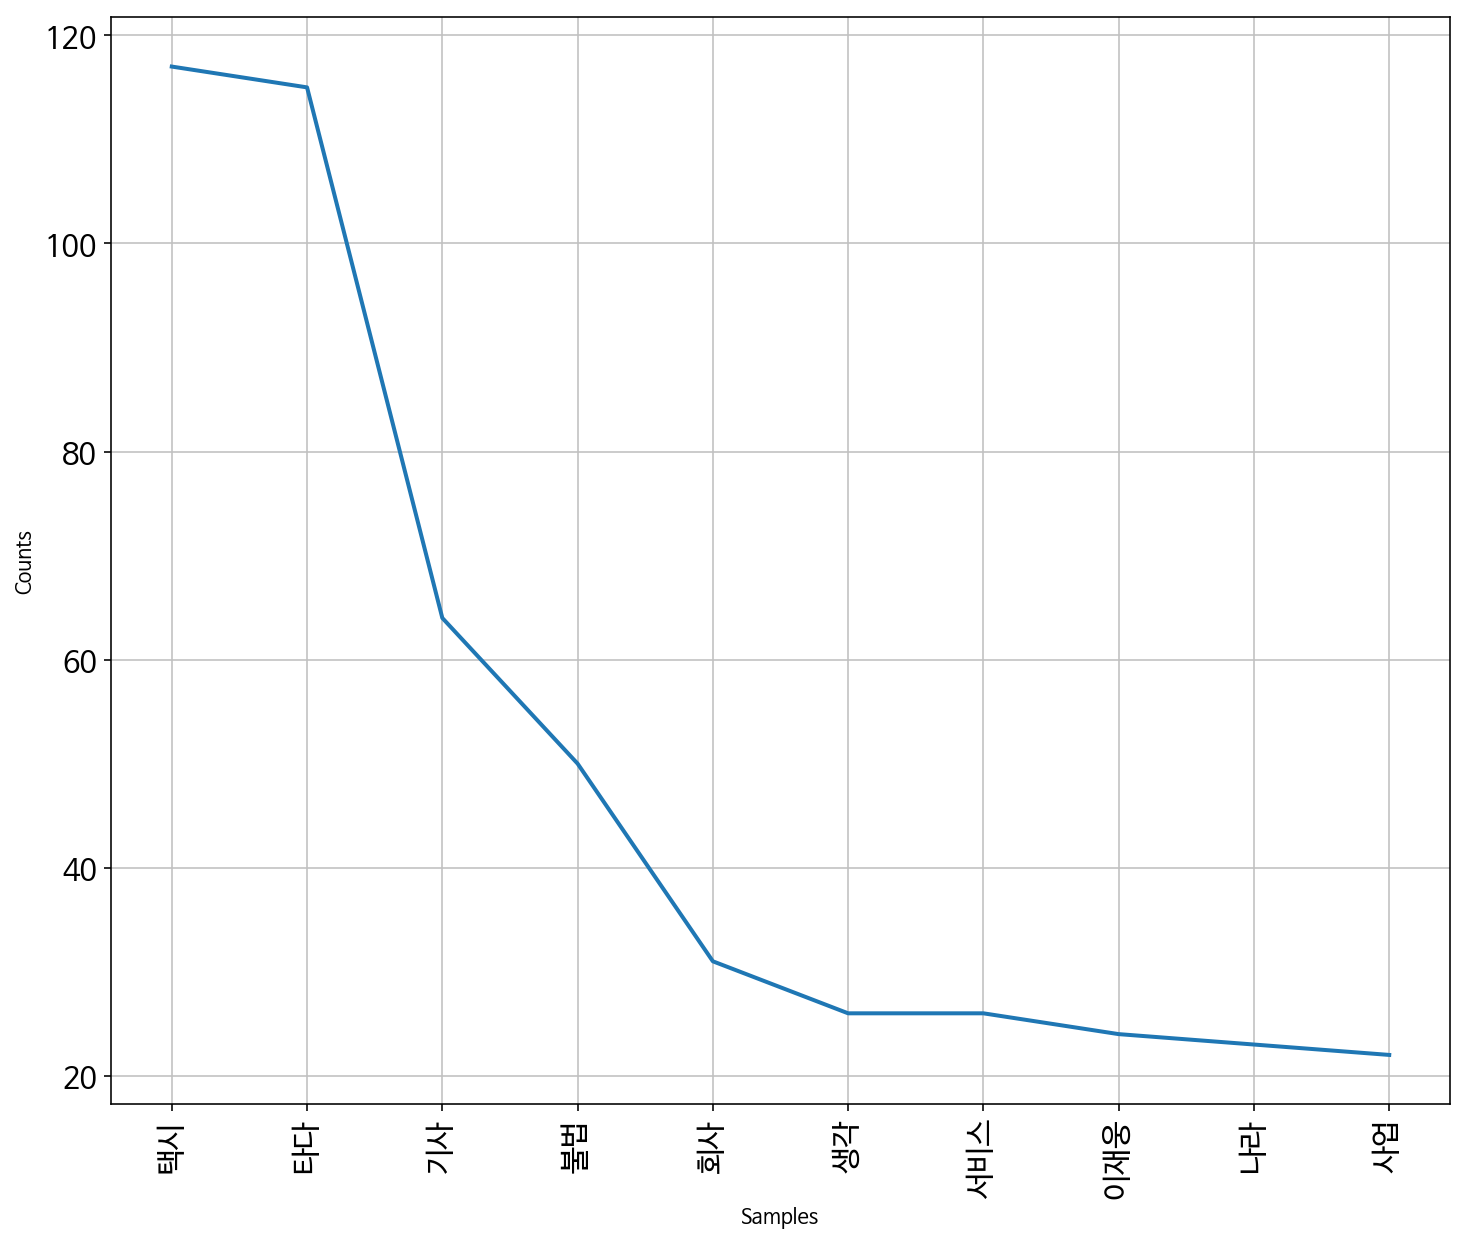

In [24]:
import nltk 
from nltk.probability import FreqDist 
import matplotlib as mpl

plt.figure(figsize=(12,10))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

# 두 단어 이상의 글자만 선택한 데이터에서 빈도수 구하고 그려주기
graph_comm = FreqDist(rm_dupl) 
graph_comm.plot(10)

#### 네트워크 분석

In [25]:
from konlpy.tag import *
import re
import csv
from apyori import apriori
import networkx as nx


import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
hannanum = Hannanum()
okt = Okt()
kkma = Kkma()

In [27]:
# 연관성 분석을 위해 댓글별로 단어 쪼개기
# hannanum 이어서 에러가 발생하는걸까?
# kkma 단어사전 추가하고 돌리기.
# /home/loveactualry/anaconda3/lib/python3.6/site-packages/konlpy/java
# kkma 작동
    # 에러메세지 : java.lang.NullPointerException
# 작동은 하나 Nullpoint 메세지를 준다. 빈 내용이 있어서 그런듯..? 빈칸이 10개가 넘어가는데 에러 메세지는 6개만...
# 형태소 분석기 성능 비교 
# https://iostream.tistory.com/144 -> 한나눔이 속도도 빠르고 일반적인 문장인데 못 나누는 이유는..? 띄어쓰기가 있어서 그런가.

# 추가 방법
# 한단어를 처리 해야 하는데 한단어만 다 빼버리면 '차'가 빠진다.
# 1.불용어 처리를 해야 할듯 2. 정규 표현식 처리에서 가능할까? 한글자를 빼되 '차'는 안 빼는 걸로.

dataset = []
for i in range(len(comment_sample)):
    dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z\s]','',comment_sample[i])))
    
test_asso = dataset
test_asso

[['지금',
  '택시',
  '회사',
  '가보',
  '가보세요기사',
  '세요',
  '기사',
  '없서',
  '차가',
  '수',
  '만아',
  '일자리',
  '말',
  '소리',
  '선택',
  '인과',
  '응보'],
 ['위법',
  '금지함개택들',
  '분노',
  '개',
  '개택',
  '택',
  '법규',
  '위반',
  '택시',
  '택시면허',
  '면허',
  '취소',
  '취소해',
  '해'],
 ['어이'],
 ['그것', '모두', '택시', '택시업계', '업계', '제한', '사과', '파이', '방법'],
 ['기업',
  '기업가가',
  '가가',
  '사업',
  '법',
  '호소',
  '자체',
  '나라',
  '거',
  '거임',
  '임',
  '민주당',
  '문',
  '문재인',
  '재인',
  '대통령',
  '나',
  '후회'],
 ['만명', '직원', '외부', '외부아웃소싱', '아웃', '소', '싱'],
 ['법인', '법인택시', '택시'],
 ['타다', '공유'],
 ['택시', '택시영업', '영업', '말장난', '말', '방법'],
 ['면허',
  '면허사서',
  '사서',
  '합법적',
  '생각',
  '차',
  '이것',
  '차산업',
  '산업',
  '판사',
  '판사검사변호사',
  '검사',
  '변호사',
  '말',
  '법',
  '법공부',
  '공부',
  '사람',
  '앱으',
  '호출',
  '채용',
  '의사',
  '수의사',
  '매스',
  '사용',
  '줄',
  '고용'],
 ['법', '테두리', '안', '우리'],
 ['법원', '뭐'],
 ['국회', '통과', '안', '이상', '매도', '뉴스', '이상한쪽', '한쪽', '마세', '뉴스거리', '거리'],
 ['너희', '정치적', '이용', '우리', '우리나라', '나라', '공유', '사업', '거'],
 [],
 ['

In [76]:
# 연관성분석 명령어, 지지도가 0.01인 것만 가져오기
result = (list(apriori(test_asso, min_support = 0.01)))


In [77]:
#items가 2개인 것만 선택하기
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] ==2) & df['support']>=0.1].sort_values(by='support',ascending=False)
df.tail(20)

,items,support,ordered_statistics,length
329,"(면허자격증, 타다)",0.012469,"[((), (면허자격증, 타다), 0.012468827930174564, 1.0),...",2
316,"(말, 차)",0.012469,"[((), (말, 차), 0.012468827930174564, 1.0), ((말)...",2
319,"(면허자격증, 면허)",0.012469,"[((), (면허자격증, 면허), 0.012468827930174564, 1.0),...",2
321,"(사기꾼, 면허)",0.012469,"[((), (사기꾼, 면허), 0.012468827930174564, 1.0), (...",2
323,"(차, 면허)",0.012469,"[((), (면허, 차), 0.012468827930174564, 1.0), ((면...",2
324,"(콜택시, 면허)",0.012469,"[((), (콜택시, 면허), 0.012468827930174564, 1.0), (...",2
326,"(택시, 면허)",0.012469,"[((), (택시, 면허), 0.012468827930174564, 1.0), ((...",2
327,"(사기꾼, 면허자격증)",0.012469,"[((), (사기꾼, 면허자격증), 0.012468827930174564, 1.0)...",2
328,"(면허자격증, 자격증)",0.012469,"[((), (면허자격증, 자격증), 0.012468827930174564, 1.0)...",2
331,"(택시, 무엇)",0.012469,"[((), (택시, 무엇), 0.012468827930174564, 1.0), ((...",2


In [78]:
# 네트워크 그려주기
G = nx.Graph()

ar=(df['items']); G.add_edges_from(ar)

In [79]:
#pos = nx.planar_layout(G)
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [80]:
#pos = nx.random_layout(G)
#pos = nx.bipartite_layout(G)
#pos = nx.circular_layout(G)
pos = nx.kamada_kawai_layout(G)
#pos = nx.planar_layout(G)
#pos = nx.rescale_layout(G)
#pos = nx.shell_layout(G)
#pos = nx.spring_layout(G)
#pos = nx.spectral_layout(G)
#pos = nx.spiral_layout(G)

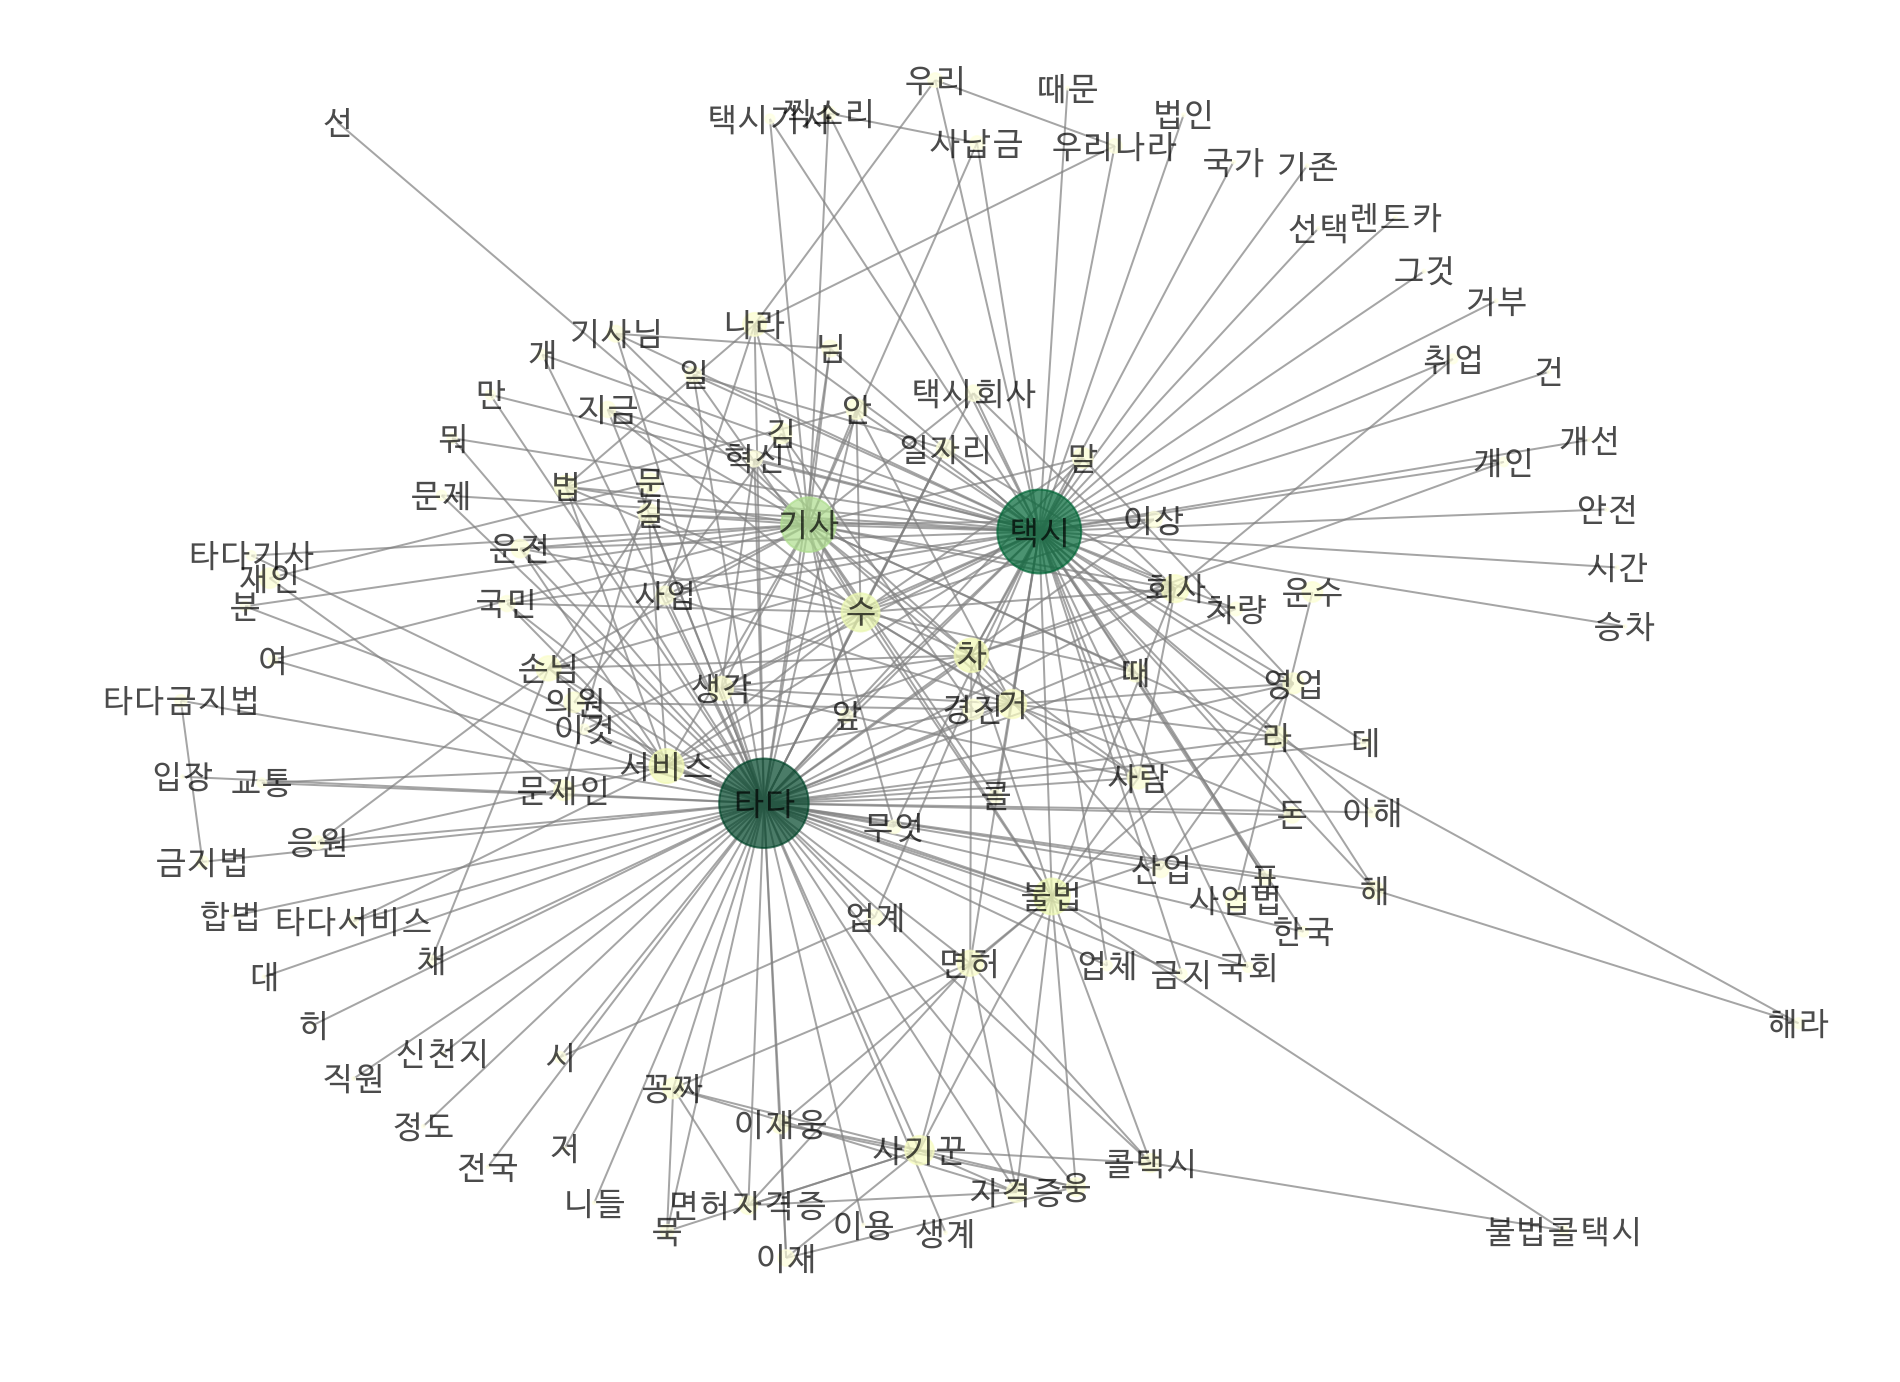

In [81]:
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx(G, font_family='D2Coding', font_size=16,
                pos=pos, node_color=list(pr.values()), node_size=nsize,
                alpha = 0.7, edge_color='.5', cmap=plt.cm.YlGn)

In [82]:
from konlpy.tag import Kkma

In [83]:
kkma = Kkma()

In [84]:
sentence = '타다 금지법 타다는 무엇을 '

In [85]:
kkma.nouns(sentence)

['타다', '금지법', '무엇']